In [2]:
from sklearn.datasets import make_blobs

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap
#from sklearn import svm
#from sklearn.svm import SVC

In [3]:
data_reg=pd.read_excel('data_reg.xlsx')
data_class=pd.read_excel('data_class.xlsx')
data_reg_prep=pd.read_excel('data_reg_prep.xlsx')
data_class_prep=pd.read_excel('data_class_prep.xlsx')

In [5]:
data_reg_temp = data_reg.drop("SalePrice",axis = 1)
cols_temp = ["OverallQual","OverallCond","IsRemodGar","IsRemod"]
data_reg_temp[cols_temp]=data_reg_temp[cols_temp].astype("object")

cat_cols = data_reg_temp.select_dtypes(include = "object").columns.tolist()
print(len(cat_cols))
print(cat_cols)

num_cols = data_reg_temp.select_dtypes(include="number").columns.tolist()
print(len(num_cols))
print(num_cols)

Xtrain,Xtest,Ytrain,Ytest = train_test_split(data_reg_temp,data_reg["SalePrice"],test_size =0.3,random_state=0)
Xtrain = Xtrain.sort_index()
Xtest = Xtest.sort_index()
Ytrain= Ytrain.sort_index()
Ytest = Ytest.sort_index()

Xtrain_index = Xtrain.index.tolist()
Xtest_index = Xtest.index.tolist()

20
['MSZoning', 'LotShape', 'HouseStyle', 'OverallQual', 'OverallCond', 'Exterior1st', 'MasVnrType', 'Foundation', 'BsmtQual', 'HeatingQC', 'CentralAir', 'KitchenQual', 'FireplaceQu', 'GarageType', 'GarageQual', 'PavedDrive', 'SaleType', 'SaleCondition', 'IsRemodGar', 'IsRemod']
9
['LotArea', 'YearBuilt', 'MasVnrArea', 'Fireplaces', 'GarAreaPerCar', 'GrLivAreaPerRoom', 'TotalHouseSF', 'TotalFullBath', 'TotalPorchSF']


In [6]:

Xtrain_cat = Xtrain[cat_cols]

Xtrain_num = Xtrain[num_cols]
train_mean= Xtrain_num.mean()
train_std = np.sqrt(Xtrain_num.var())

Xtest_cat = Xtest[cat_cols]
Xtest_num = Xtest[num_cols]

Xtrain_num_std = Xtrain_num.apply(lambda x: (x - x.mean()) / np.sqrt(x.var())) 
Xtest_num_std = Xtest_num.copy()
for i in num_cols:
    Xtest_num_std[i] = (Xtest_num_std[i] - train_mean[i]) / train_std[i]

#axis = 0 caculate the mean or var through columns ,which is the default value in apply
# data_num_nor = data_num[numeric_cols].apply(lambda x: (x - x.min()) / (x.max(axis=0) - x.min(axis=0)))

#dummy的话最好一起dummy，因为有可能 test dataset 没有一些分类，导致train和test 的dummy的维度不一致

cat_dummy = data_reg_temp[cat_cols].copy()
for i in cat_cols:
    dummy_df = pd.get_dummies(cat_dummy[i], prefix=i,dtype=int)
    cat_dummy = pd.concat([cat_dummy,dummy_df], axis=1)
    cat_dummy = cat_dummy.drop(i, axis = 1)
print(cat_dummy.shape) 

Xtest_cat_dummy = cat_dummy.iloc[Xtest_index,:]
Xtrain_cat_dummy = cat_dummy.iloc[Xtrain_index,:]




(2930, 125)


C:\Users\T480S\AppData\Local\Temp\ipykernel_30404\3613799499.py:22: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  dummy_df = pd.get_dummies(cat_dummy[i], prefix=i,dtype=int)
C:\Users\T480S\AppData\Local\Temp\ipykernel_30404\3613799499.py:22: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  dummy_df = pd.get_dummies(cat_dummy[i], prefix=i,dtype=int)
C:\Users\T480S\AppData\Local\Temp\ipykernel_30404\3613799499.py:22: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  dummy_df = pd.get_dummies(cat_dummy[i], prefix=i,dtype=int)
C:\Users\T480S\AppData\Local\Temp\ipykernel_30404\3613799499.py:22: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when

In [7]:
Xtrain_lr = pd.concat((Xtrain_num_std,Xtrain_cat_dummy),axis = 1)
Xtest_lr = pd.concat((Xtest_num_std,Xtest_cat_dummy),axis = 1)
Ytrain_lr = Ytrain
Ytest_lr = Ytest

Xtrain_tree = pd.concat((Xtrain_num,Xtrain_cat),axis = 1)
Xtest_tree = pd.concat((Xtest_num,Xtest_cat),axis = 1)
Ytrain_tree = data_class.iloc[Xtrain_index,:]["PriceLevel"]
Ytest_tree = data_class.iloc[Xtest_index,:]["PriceLevel"]




In [146]:
data_class.iloc[Xtest_index,:]["PriceLevel"]

4         High
6         High
9         High
10        High
14        High
         ...  
2915    Medium
2916       Low
2918       Low
2920       Low
2928      High
Name: PriceLevel, Length: 879, dtype: object

In [8]:
from xgboost import XGBRegressor as XGBR
from sklearn.ensemble import RandomForestRegressor as RFR
from sklearn.linear_model import LinearRegression as LinearR
from sklearn.model_selection import KFold, cross_val_score as CVS, train_test_split as TTS
from sklearn.metrics import mean_squared_error as MSE
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from time import time
import datetime

In [65]:
reg = XGBR(n_estimators=100).fit(Xtrain_lr,Ytrain_lr)
reg.predict(Xtest_lr) 
print(reg.score(Xtest_lr,Ytest_lr)) #R**2
print(np.sqrt(MSE(Ytest_lr,reg.predict(Xtest_lr))))
# print(reg.feature_importances_)
# print(reg.feature_names_in_)
# one of the advantages of tree models is the ability to view feature importance scores, 
# which allows for feature selection using embedded methods.

sorted_indices = np.argsort(reg.feature_importances_)[::-1]

# Retrieve the list of feature names based on the ranking.
sorted_feature_names = [reg.feature_names_in_[i] for i in sorted_indices]

print(sorted(reg.feature_importances_,reverse=True))
print(sorted_feature_names)

0.8334450829546655
33992.47181026181
[0.35906404, 0.14389962, 0.106240995, 0.08419288, 0.025064964, 0.016482929, 0.015391428, 0.013190284, 0.0110300165, 0.01101493, 0.007924537, 0.00782145, 0.0076014725, 0.0066267964, 0.0066122254, 0.006470504, 0.005725454, 0.005702184, 0.0054715825, 0.0054024947, 0.0053847777, 0.005311452, 0.00483074, 0.0047843014, 0.004405962, 0.004381052, 0.004351347, 0.0041938173, 0.004191567, 0.004095189, 0.0038381552, 0.0037559955, 0.0036940787, 0.0033485403, 0.0033276824, 0.0032816983, 0.0032665923, 0.0031446842, 0.002782946, 0.0025802862, 0.002578483, 0.0025783621, 0.0024502089, 0.0024489535, 0.0024477444, 0.0022949898, 0.0021040346, 0.0020829593, 0.0019664806, 0.0019537068, 0.0019130047, 0.0017603061, 0.0015574596, 0.001553323, 0.0014769583, 0.001472547, 0.0014570887, 0.0014344751, 0.0014233192, 0.0013459302, 0.0013158215, 0.00130699, 0.0012972188, 0.0012818911, 0.0012261951, 0.0012176299, 0.001100311, 0.0010124787, 0.000997619, 0.0009493846, 0.00093613757, 0.

In [73]:
reg = XGBR(n_estimators=100)
print(CVS(reg,Xtrain_lr,Ytrain_lr,cv=5).mean())
print(CVS(reg,Xtrain_lr,Ytrain_lr,cv=5,scoring='neg_mean_squared_error').mean())
print(CVS(reg,Xtrain_lr,Ytrain_lr,cv=5,scoring='neg_mean_absolute_error').mean())



0.8666777247907085
-797824684.6946359
-17869.071942790855


In [75]:
rfr = RFR(n_estimators=100)
print(CVS(rfr,Xtrain_lr,Ytrain_lr,cv=5).mean())
print(CVS(rfr,Xtrain_lr,Ytrain_lr,cv=5,scoring='neg_mean_squared_error').mean())
print(CVS(rfr,Xtrain_lr,Ytrain_lr,cv=5,scoring='neg_mean_absolute_error').mean())

lr = LinearR()
print(CVS(lr,Xtrain_lr,Ytrain_lr,cv=5).mean())
print(CVS(lr,Xtrain_lr,Ytrain_lr,cv=5,scoring='neg_mean_squared_error').mean())
print(CVS(lr,Xtrain_lr,Ytrain_lr,cv=5,scoring='neg_mean_absolute_error').mean())

0.8680937778146468
-802805436.7445108
-17913.763550003252
-1.2320216020675496e+20
-7.12304862476704e+29
-43806500531691.414


200 0.8671036619161981


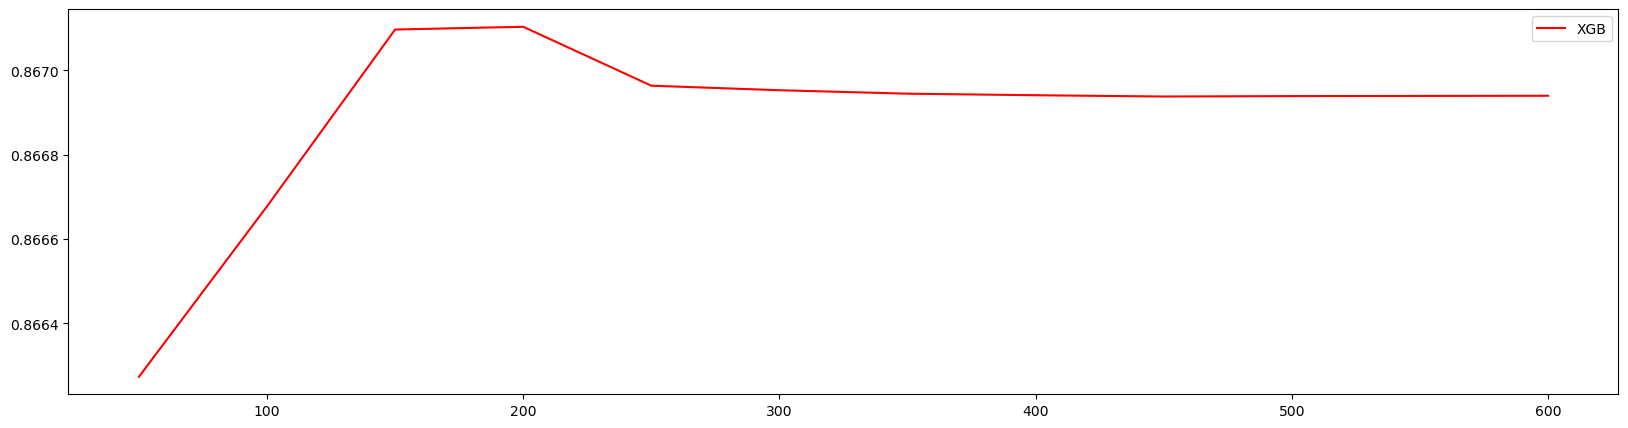

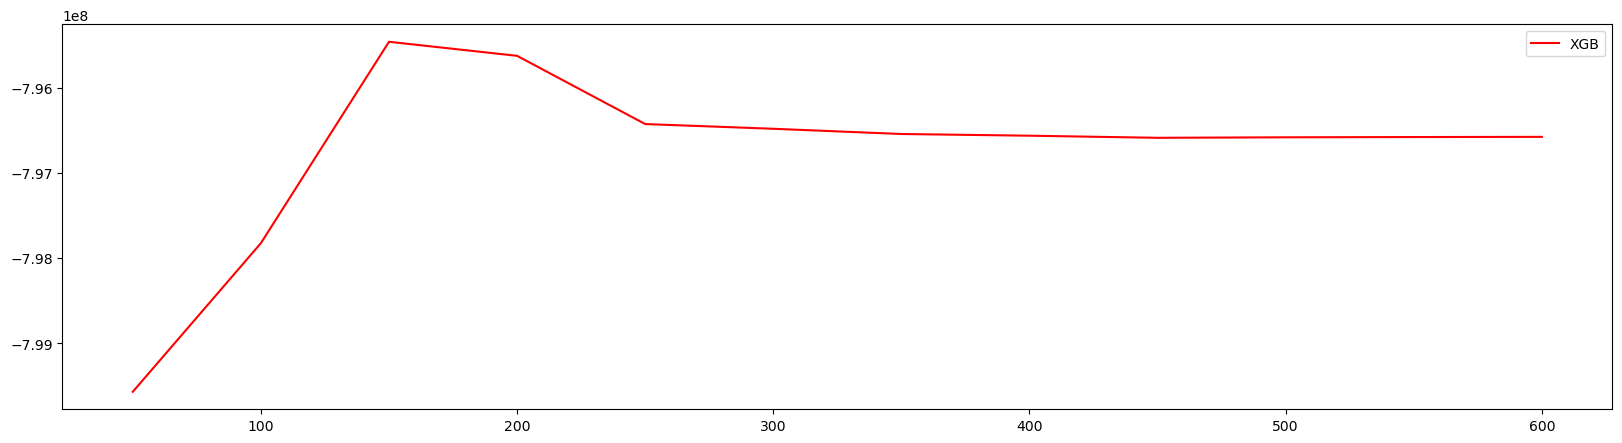

In [76]:
#cv = KFold(n_splits=5, shuffle = True, random_state=0)
axisx = range(50,601,50)
rs = []
ms = []
for i in axisx:
    reg = XGBR(n_estimators=i,random_state=0)
    rs.append(CVS(reg,Xtrain_lr,Ytrain_lr,cv=5).mean())
    ms.append(CVS(reg,Xtrain_lr,Ytrain_lr,cv=5,scoring='neg_mean_squared_error').mean())
    
print(axisx[rs.index(max(rs))],max(rs))
plt.figure(figsize=(20,5))
plt.plot(axisx,rs,c="red",label="XGB")
plt.legend()
plt.show()

plt.figure(figsize=(20,5))
plt.plot(axisx,ms,c="red",label="XGB")
plt.legend()
plt.show()

In [ ]:
axisx = range(140,231,10)
rs = []
var = []
ge = []

rs1 = []
var1 = []
ge1 = []
for i in axisx:
    reg = XGBR(n_estimators=i,random_state=0)
    cvresult = CVS(reg,Xtrain_lr,Ytrain_lr,cv=5)
    rs.append(cvresult.mean())
    var.append(cvresult.var())
    ge.append((1 - cvresult.mean())**2+cvresult.var())

    cvresult1 = CVS(reg,Xtrain_lr,Ytrain_lr,cv=5,scoring= "neg_mean_absolute_error")
    rs1.append(cvresult1.mean())
    var1.append(cvresult1.var())
    ge1.append((Ytrain_lr - cvresult1.mean())**2+cvresult1.var())
print(axisx[rs.index(max(rs))],max(rs),var[rs.index(max(rs))])
print(axisx[var.index(min(var))],rs[var.index(min(var))],min(var))
print(axisx[ge.index(min(ge))],rs[ge.index(min(ge))],var[ge.index(min(ge))],min(ge))
print("#################################")
# print(axisx[rs1.index(max(rs1))],max(rs1),var1[rs1.index(max(rs1))])
# print(axisx[var1.index(min(var1))],rs1[var1.index(min(var1))],min(var1))
# print(axisx[ge1.index(min(ge1))],rs1[ge1.index(min(ge1))],var[ge1.index(min(ge1))],min(ge1))
# rs1 = np.array(rs1)
# var1 = np.array(var1)*0.01
################################################################################################
plt.figure(figsize=(20,5))
plt.plot(axisx,rs,c="black",label="XGB")
#add variance line
plt.plot(axisx,rs+var,c="red",linestyle='-.')
plt.plot(axisx,rs-var,c="red",linestyle='-.')
plt.legend()
plt.show()
#checking the controllable part of the generalization error?
plt.figure(figsize=(20,5))
plt.plot(axisx,ge,c="gray",linestyle='-.')
plt.show()
################################################################
# plt.figure(figsize=(20,5))
# plt.plot(axisx,rs1,c="black",label="XGB")
# #添加方差线
# plt.plot(axisx,rs1+var1,c="red",linestyle='-.')
# plt.plot(axisx,rs1-var1,c="red",linestyle='-.')
# plt.legend()
# plt.show()
# #看看泛化误差的可控部分如何？
# plt.figure(figsize=(20,5))
# plt.plot(axisx,ge1,c="gray",linestyle='-.')
# plt.show()


10
<class 'list'>
<class 'list'>


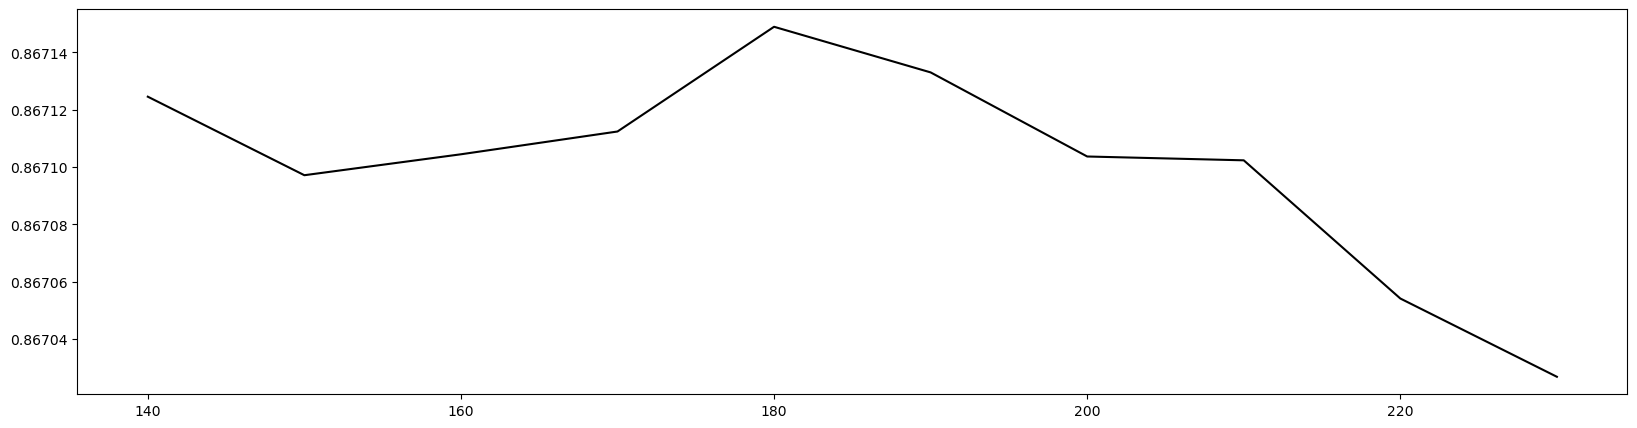

In [99]:
axisx = np.linspace(140,231,10)
print(len(axisx))
print(type(rs))
print(type(var))

rs+var
plt.figure(figsize=(20,5))
plt.plot(axisx,rs,c="black",label="XGB")
# plt.plot([*range(140,231,10)],rs+var,c="red",linestyle='-.')
# # plt.plot(axisx,rs-var,c="red",linestyle='-.')
# # plt.legend()

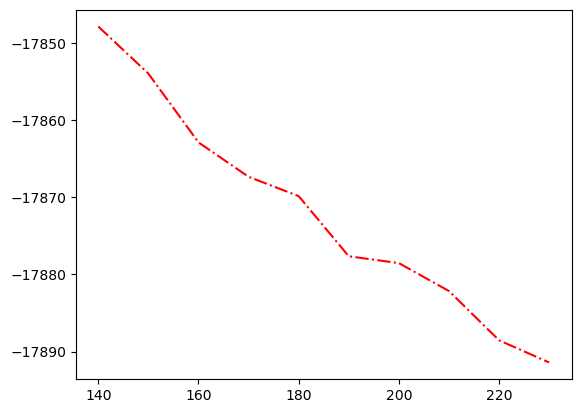

In [80]:
plt.plot(axisx,rs1,c="red",linestyle='-.')

0.9 0.867691174042854 0.0003618686178410393
1.0 0.8671489380390002 0.0002843700181531586
0.9 0.867691174042854 0.0003618686178410393 0.01786749404399939


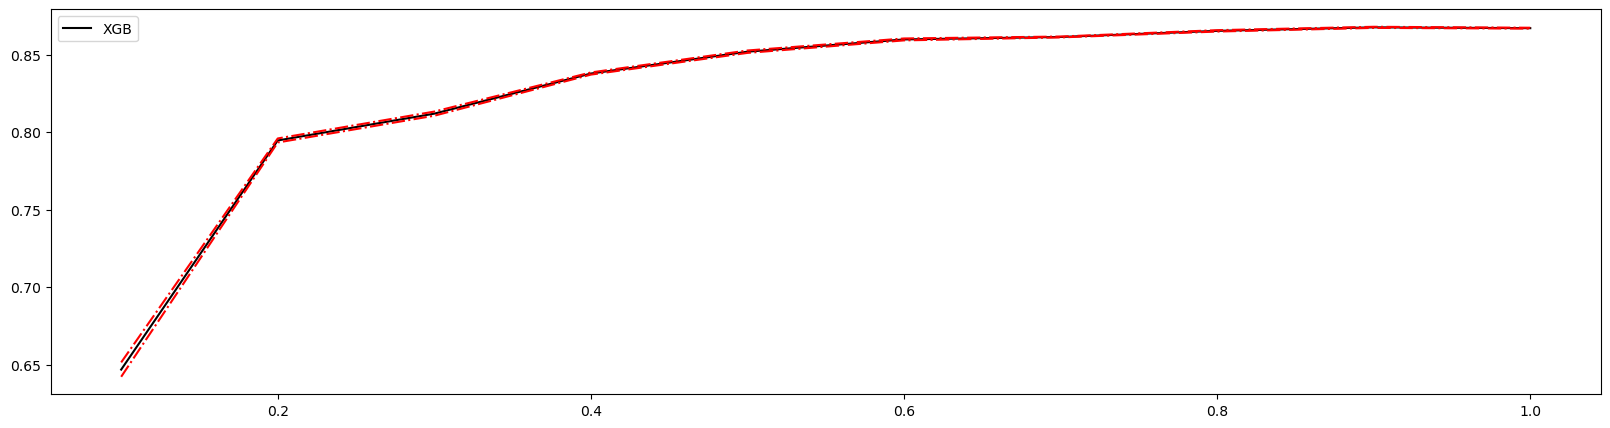

In [101]:
# axisx = np.linspace(0,1,20)
# rs = []
# for i in axisx:
#     reg = XGBR(n_estimators=180,subsample=i,random_state=0)
#     rs.append(CVS(reg,Xtrain_lr,Ytrain_lr,cv=5).mean())
# print(axisx[rs.index(max(rs))],max(rs))
# plt.figure(figsize=(20,5))
# plt.plot(axisx,rs,c="green",label="XGB")
# plt.legend()
# plt.show()
#细化学习曲线
axisx = np.linspace(0.1,1,10)
rs = []
var = []
ge = []
for i in axisx:
    reg = XGBR(n_estimators=180,subsample=i,random_state=420)
    cvresult = CVS(reg,Xtrain_lr,Ytrain_lr,cv=5)
    rs.append(cvresult.mean())
    var.append(cvresult.var())
    ge.append((1 - cvresult.mean())**2+cvresult.var())
print(axisx[rs.index(max(rs))],max(rs),var[rs.index(max(rs))])
print(axisx[var.index(min(var))],rs[var.index(min(var))],min(var))
print(axisx[ge.index(min(ge))],rs[ge.index(min(ge))],var[ge.index(min(ge))],min(ge))
rs = np.array(rs)
var = np.array(var)
plt.figure(figsize=(20,5))
plt.plot(axisx,rs,c="black",label="XGB")
plt.plot(axisx,rs+var,c="red",linestyle='-.')
plt.plot(axisx,rs-var,c="red",linestyle='-.')
plt.legend()
plt.show()

0.8842105263157896 0.8738988127094853 0.00039209973999041766
0.9157894736842105 0.8737026059290836 0.0002664490613421647
0.9157894736842105 0.8737026059290836 0.0002664490613421647 0.016217480810446525


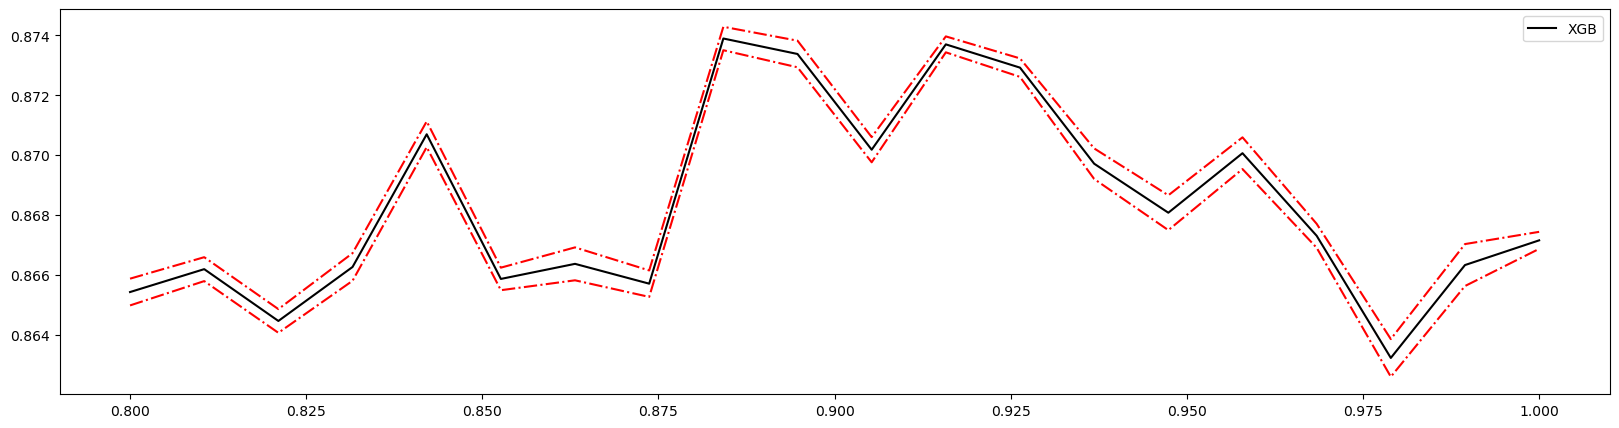

In [104]:
axisx = np.linspace(0.8,1,20)
rs = []
var = []
ge = []
for i in axisx:
    reg = XGBR(n_estimators=180,subsample=i,random_state=420)
    cvresult = CVS(reg,Xtrain_lr,Ytrain_lr,cv=5)
    rs.append(cvresult.mean())
    var.append(cvresult.var())
    ge.append((1 - cvresult.mean())**2+cvresult.var())
print(axisx[rs.index(max(rs))],max(rs),var[rs.index(max(rs))])
print(axisx[var.index(min(var))],rs[var.index(min(var))],min(var))
print(axisx[ge.index(min(ge))]-1,rs[ge.index(min(ge))],var[ge.index(min(ge))],min(ge))
rs = np.array(rs)
var = np.array(var)
plt.figure(figsize=(20,5))
plt.plot(axisx,rs,c="black",label="XGB")
plt.plot(axisx,rs+var,c="red",linestyle='-.')
plt.plot(axisx,rs-var,c="red",linestyle='-.')
plt.legend()
plt.show()

In [110]:
print(axisx[ge.index(min(ge))-1],rs[ge.index(min(ge))],var[ge.index(min(ge))],min(ge))

0.9052631578947369 0.8737026059290836 0.0002664490613421647 0.016217480810446525


In [102]:
reg = XGBR(n_estimators=180
            ,subsample=0.9
            ,random_state=0).fit(Xtrain_lr,Ytrain_lr)
print(reg.score(Xtest_lr,Ytest_lr))
print(np.sqrt(MSE(Ytest_lr,reg.predict(Xtest_lr))))

0.8375792938461252
33567.94183487613


In [111]:
reg = XGBR(n_estimators=180
            ,subsample=0.9052631578947369 
            ,random_state=0).fit(Xtrain_lr,Ytrain_lr)
print(reg.score(Xtest_lr,Ytest_lr))
print(np.sqrt(MSE(Ytest_lr,reg.predict(Xtest_lr))))

0.8412495526515966
33186.50332919761


0.11 0.8879355046968603 0.00024759166140636985
0.09999999999999999 0.8856405643267549 0.0001830463654852899
-0.89 0.8879355046968603 0.00024759166140636985 0.012806042768953781


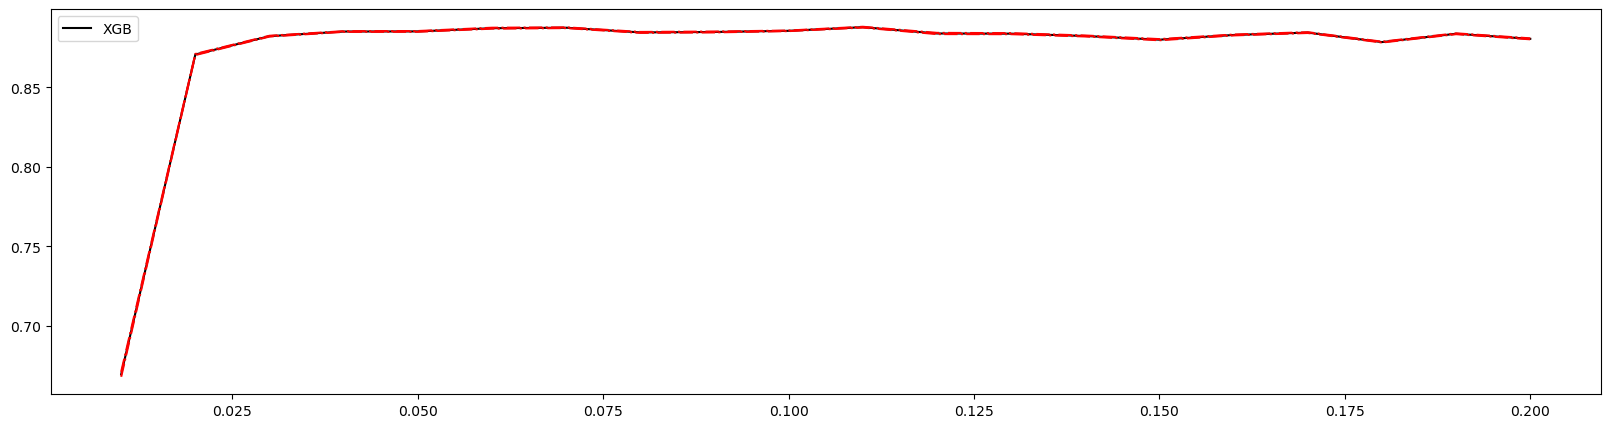

In [113]:
axisx = np.linspace(0.01,0.2,20)
rs = []
var = []
ge = []
for i in axisx:
    reg = XGBR(n_estimators=180,subsample=0.9052631578947369,random_state=0,learning_rate=i)
    cvresult = CVS(reg,Xtrain_lr,Ytrain_lr,cv=5)
    rs.append(cvresult.mean())
    var.append(cvresult.var())
    ge.append((1 - cvresult.mean())**2+cvresult.var())
print(axisx[rs.index(max(rs))],max(rs),var[rs.index(max(rs))])
print(axisx[var.index(min(var))],rs[var.index(min(var))],min(var))
print(axisx[ge.index(min(ge))],rs[ge.index(min(ge))],var[ge.index(min(ge))],min(ge))
rs = np.array(rs)
var = np.array(var)
plt.figure(figsize=(20,5))
plt.plot(axisx,rs,c="black",label="XGB")
plt.plot(axisx,rs+var,c="red",linestyle='-.')
plt.plot(axisx,rs-var,c="red",linestyle='-.')
plt.legend()
plt.show()

In [114]:
reg = XGBR(n_estimators=180
            ,subsample=0.9052631578947369
            , learning_rate=0.11 
            ,random_state=0).fit(Xtrain_lr,Ytrain_lr)
print(reg.score(Xtest_lr,Ytest_lr))
print(np.sqrt(MSE(Ytest_lr,reg.predict(Xtest_lr))))

0.8443415588783725
32861.72486655375


In [120]:

from sklearn.model_selection import GridSearchCV

# Define the range of values for n_estimators and learning_rate
n_estimators_range = [100,150,200,250,300]
learning_rate_range = np.linspace(0.01, 0.2, 20)

# Create a parameter grid to search for the best combination
param_grid = {
    'n_estimators': n_estimators_range,
    'learning_rate': learning_rate_range
}

# Create the XGBoost model
xgb_model = XGBR(subsample=0.905, random_state=0)

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the grid search to the data
grid_search.fit(Xtrain_lr, Ytrain_lr)

# Get the best hyperparameters and corresponding mean negative MSE score
best_params = grid_search.best_params_
best_score = -grid_search.best_score_

# Print the results
print("Best Hyperparameters:", best_params)
print("Best Negative MSE Score:", best_score)


Best Hyperparameters: {'learning_rate': 0.060000000000000005, 'n_estimators': 300}
Best Negative MSE Score: 664429341.9338801


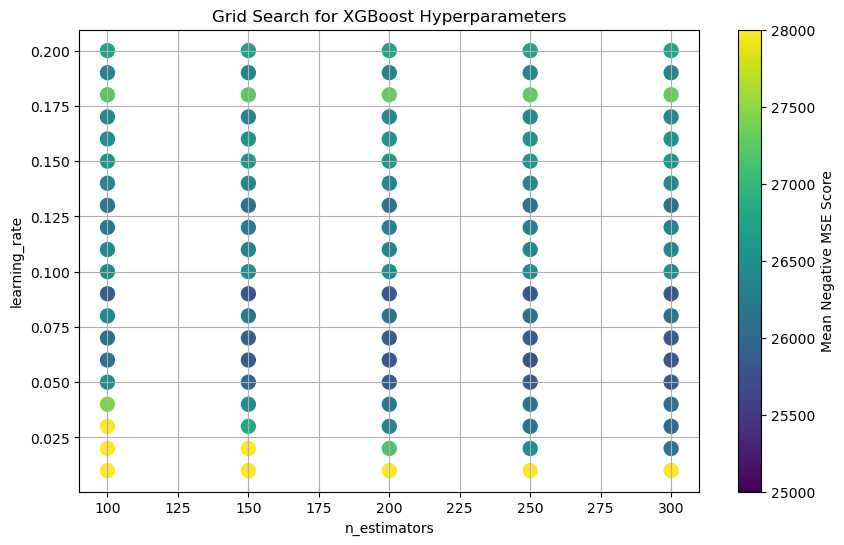

In [131]:
results = grid_search.cv_results_

# Extract the hyperparameter values and mean negative MSE scores
n_estimators_values = results['param_n_estimators']
learning_rate_values = results['param_learning_rate']
mean_neg_mse_scores = -results['mean_test_score']

# Convert hyperparameter values to numeric types
n_estimators_values = np.array(n_estimators_values, dtype=float)
learning_rate_values = np.array(learning_rate_values, dtype=float)

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(n_estimators_values, learning_rate_values, c=np.sqrt(mean_neg_mse_scores), \
    cmap='viridis', marker='o', s=100, vmin=25000, vmax=28000)
plt.colorbar(label='Mean Negative MSE Score')
plt.xlabel('n_estimators')
plt.ylabel('learning_rate')
plt.title('Grid Search for XGBoost Hyperparameters')
plt.grid(True)
plt.show()

In [135]:
reg = XGBR(n_estimators=300
            ,subsample=0.905
            , learning_rate=0.060000000000000005 
            ,random_state=0).fit(Xtrain_lr,Ytrain_lr)
print(reg.score(Xtest_lr,Ytest_lr))
print(np.sqrt(MSE(Ytest_lr,reg.predict(Xtest_lr))))

0.8514428723308647
32103.38031550037


In [138]:
for booster in ["gbtree","gblinear","dart"]:
    reg = XGBR(n_estimators=300
                 ,subsample=0.905
                 ,learning_rate=0.060000000000000005 
                    ,booster=booster).fit(Xtrain_lr,Ytrain_lr)
    print(booster)
    print(reg.score(Xtest_lr,Ytest_lr))

gbtree
0.8530726583040292
[21:10:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "subsample" } are not used.

gblinear
0.8152484164073215
dart
0.8566145323460598


In [139]:
print(np.sqrt(MSE(Ytest_lr,reg.predict(Xtest_lr))))

31539.629359898976


In [142]:
import xgboost as xgb
# Use DMatrix class to load data
dtrain = xgb.DMatrix(Xtrain_lr, Ytrain_lr)
dtest = xgb.DMatrix(Xtest_lr, Ytest_lr)
# Unfortunately, we can't open and view the data directly, so it's usually read into pandas first for inspection before being loaded into DMatrix
dtrain
# Specify parameters, silent is False by default, usually needs to be manually set to False
param = {
    'silent': False,
    'objective': 'reg:linear',
    'eta': 0.060000000000000005,
    'subsample': 0.905
}
num_round = 300
# train class, parameters can be directly passed as training data, number of trees, other parameters need to be passed via params
bst = xgb.train(param, dtrain, num_round)
# predict interface
from sklearn.metrics import r2_score
print(r2_score(Ytest_lr, bst.predict(dtest)))
print(np.sqrt(MSE(Ytest_lr, bst.predict(dtest))))


[21:41:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[21:41:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "silent" } are not used.

0.8530726583040292
31926.795272044117


# classification

In [9]:
from xgboost import XGBClassifier as XGBC
from sklearn.metrics import confusion_matrix as cm, recall_score as recall, roc_auc_score as auc
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the target variable Ytrain
Ytrain_tree = label_encoder.fit_transform(Ytrain_tree)
Ytest_tree = label_encoder.fit_transform(Ytest_tree)
# Get the mapping between original labels and encoded numeric labels
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

# Print the mapping
print("Mapping between original labels and encoded numeric labels:")
for original_label, encoded_label in label_mapping.items():
    print(f"{original_label}: {encoded_label}")

clf = XGBC(n_estimators=300
        ,subsample=0.905
        ,learning_rate=0.060000000000000005 ).fit(Xtrain_lr,Ytrain_tree)
ypred = clf.predict(Xtest_lr)
print(clf.score(Xtest_lr,Ytest_tree))
# cm(Ytest_tree,ypred,labels=[1,0]),
# recall(Ytest_tree,ypred),
# auc(Ytest_tree,clf.predict_proba(Xtest_lr)[:,1]))

Mapping between original labels and encoded numeric labels:
High: 0
Low: 1
Medium: 2
Very High: 3
0.7838452787258248


In [14]:
from sklearn.model_selection import GridSearchCV


n_estimators_range = [200,250,300,350]
learning_rate_range = np.linspace(0.01, 0.3, 20)
# subsample_range = np.linspace(0.8,1,5)
# max_depth_range = [5,8,11,14,17,20]
# objective_range = ["Softmax"]
booster_range = ["gbtree"]
# gamma_range =  np.linspace(0.05,0.1,5)


# n_estimators_range = [300,350]
# learning_rate_range = np.linspace(0.05, 0.1,5 )
# subsample_range = np.linspace(0.8,1,2)
# max_depth_range = [11,14]
# objective_range = ["Softmax"]
# booster_range = ["gbtree","dart"]
# gamma_range =  np.linspace(0.05,0.1,2)
# Create a parameter grid to search for the best combination
param_grid = {
    'n_estimators': n_estimators_range
    ,'learning_rate': learning_rate_range
    ,'subsample':[0.905]
    #,'max_depth':max_depth_range
    #,'objective':["Softmax"]
    ,'booster':booster_range
    #,'gamma':0.1
}

# Create the XGBoost model
xgb_model = XGBC(random_state=0)

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=2)

# Fit the grid search to the data
grid_search.fit(Xtrain_lr, Ytrain_tree)

# Get the best hyperparameters and corresponding mean negative MSE score
best_params = grid_search.best_params_
best_score = -grid_search.best_score_

# Print the results
print("Best Hyperparameters:", best_params)
print("Best Negative MSE Score:", best_score)



Best Hyperparameters: {'booster': 'gbtree', 'learning_rate': 0.11684210526315789, 'n_estimators': 200, 'subsample': 0.905}
Best Negative MSE Score: -0.7381776256359055


In [15]:
grid_search.fit(Xtest_lr, Ytest_tree)
best_score = -grid_search.best_score_
print("Best Negative MSE Score:", best_score)

In [16]:
print("Best Negative MSE Score:", best_score)

Best Negative MSE Score: -0.7098907641333609
